<a href="https://colab.research.google.com/github/Amulya-Anurag/Airplane-Customer-Satisfaction/blob/main/Airplane_customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Math, Numpy and Pandas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#warnings supression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/sample_data/airline_passenger_satisfaction.csv")
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
print(f"The data shape is : {data.shape} ")

The data shape is : (129880, 24) 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [ ]:
data.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


We have 24 columns of data, *Unnamed: 0* is just index and should be removed are categorical (e.g. gender and satisfaction), some are integer (e.g. age, flight distance), one is float (arrival delay in minutes). Many contain discrete values between 0-5 which were probably collected using customer satisfaction surveys.

In [ ]:
data = data.drop('Unnamed: 0',axis = 1)

In [ ]:
data

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
# Take a better look at categorical data
cat_columns = data.select_dtypes(include = ['object'])
unique_values = cat_columns.nunique(dropna=False)
print (unique_values)

Gender            2
customer_type     2
type_of_travel    2
customer_class    3
satisfaction      2
dtype: int64


In [ ]:
cat_columns.head()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


5 categorical columns, most of them with only 2 possible values (this includes the target). The last one (customer class) has 3 categorical values. 

# Onehotkey Encoding
We will use hotkey encoding to deal with the categorical data:

In [ ]:
data = pd.get_dummies(data, drop_first = True)
print("The data shape is : {} ".format(data.shape))
data.head()


The data shape is : (129880, 24) 


,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,0,1


In [ ]:
data.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.492616,0.183092,0.309416,0.448945,0.072459,0.434463
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,0.499947,0.386743,0.462255,0.497388,0.259248,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.columns

Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'Gender_Male', 'customer_type_disloyal Customer',
       'type_of_travel_Personal Travel', 'customer_class_Eco',
       'customer_class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')

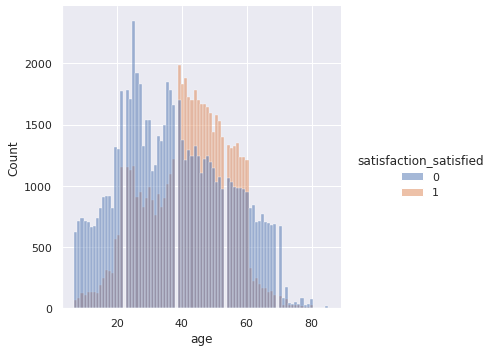

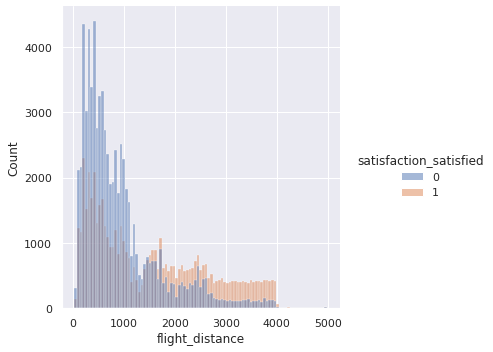

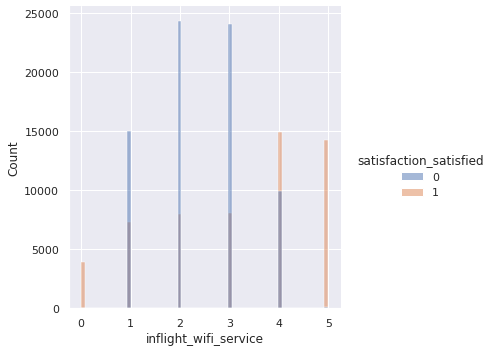

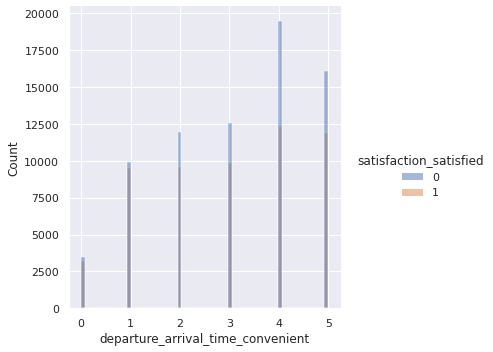

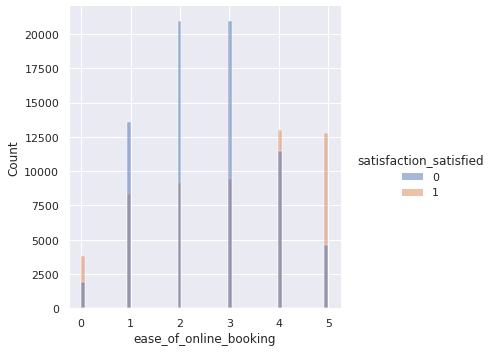

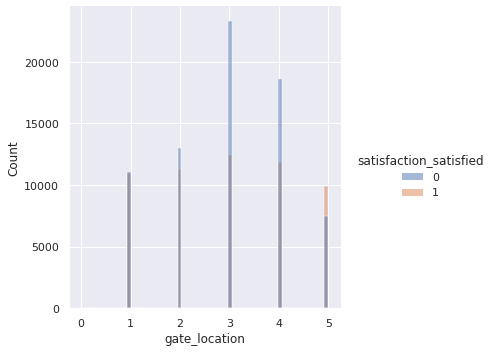

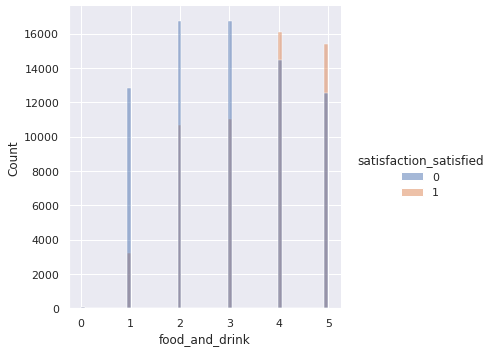

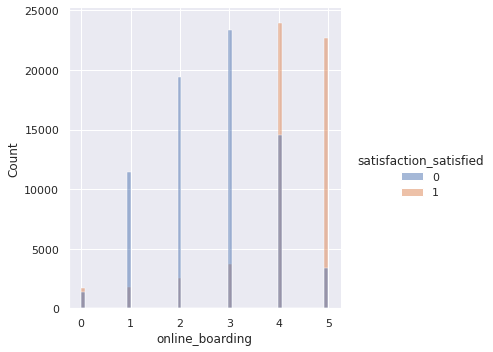

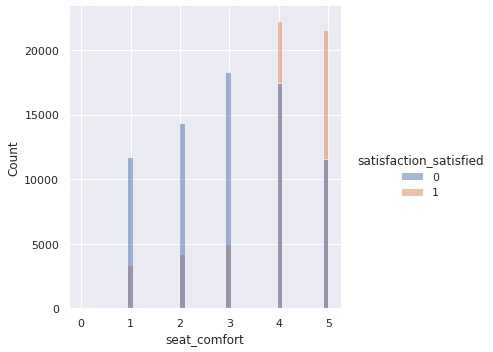

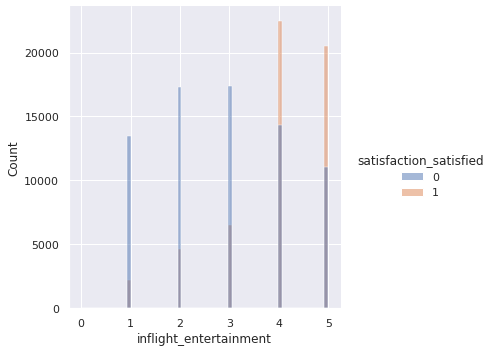

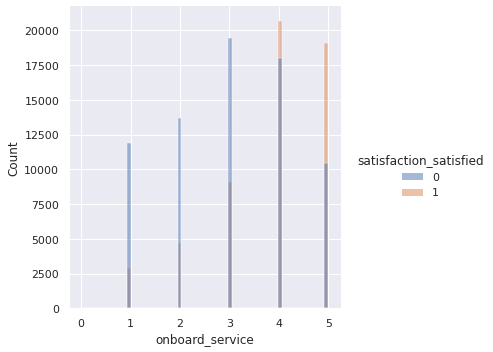

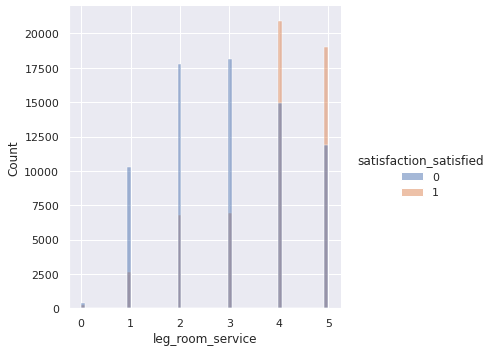

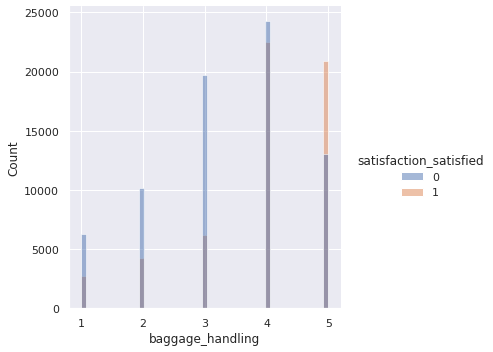

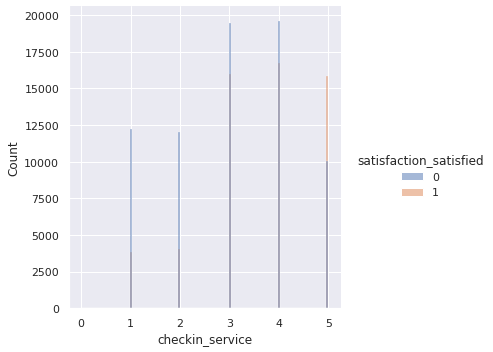

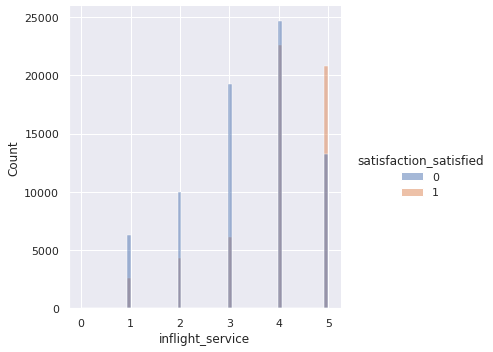

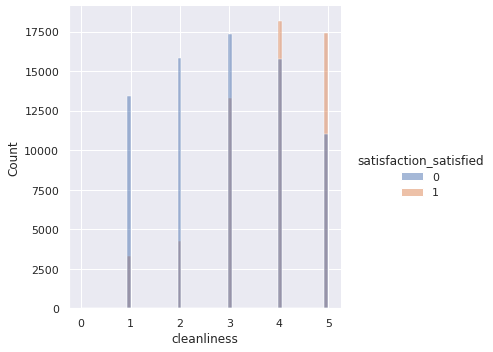

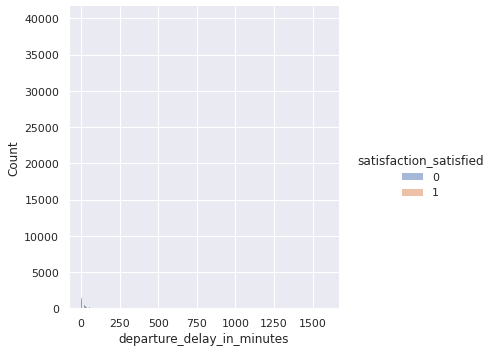

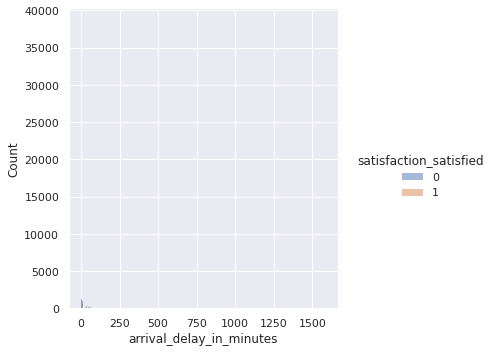

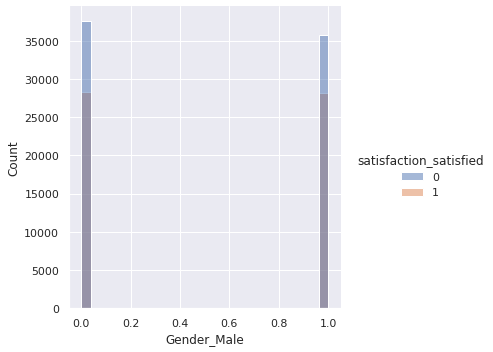

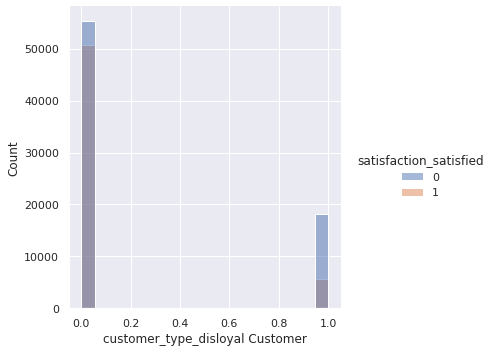

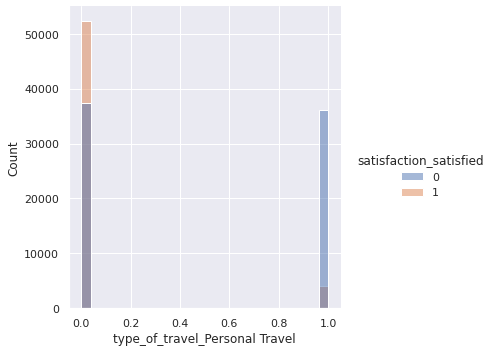

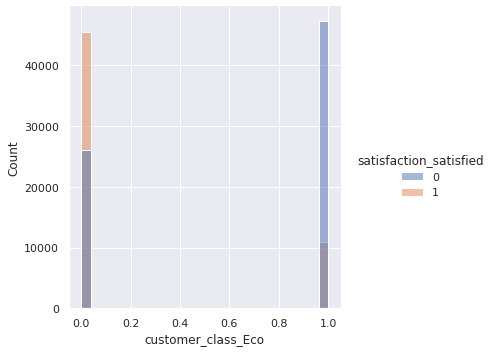

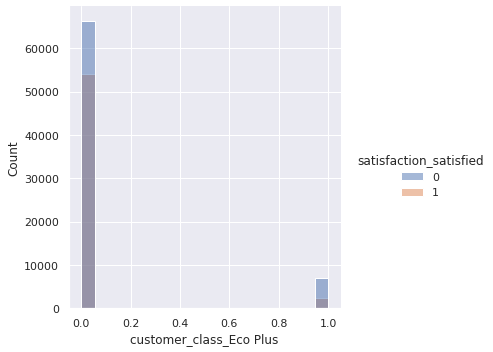

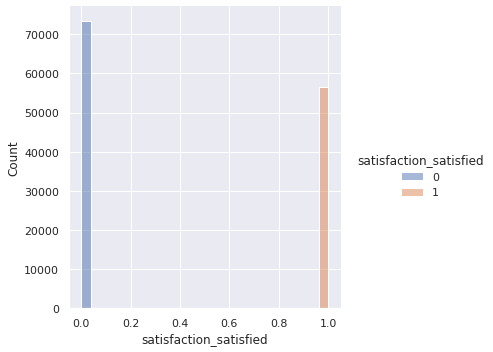

In [ ]:
for i in data.columns:
  sns.displot(data = data ,x = i,hue ='satisfaction_satisfied' )
  plt.show()

Looking at the distributions, There are quite a few features on the diagonal where the red and blue distributions (for different labels) are not overlapping. This is good news as these features may have some power to predict our target.
Let us focus on some of these features:

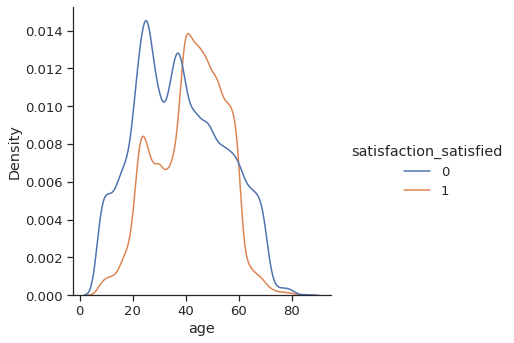

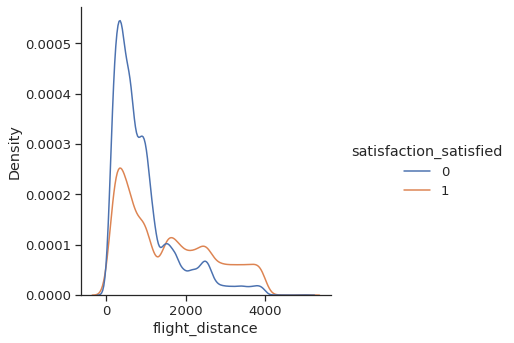

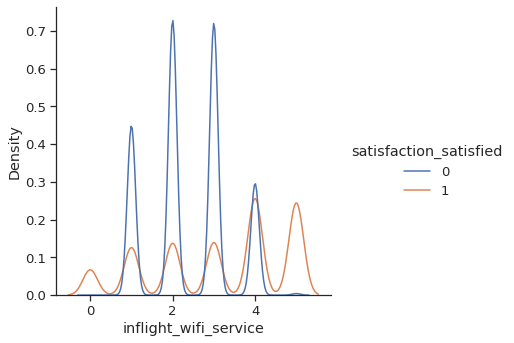

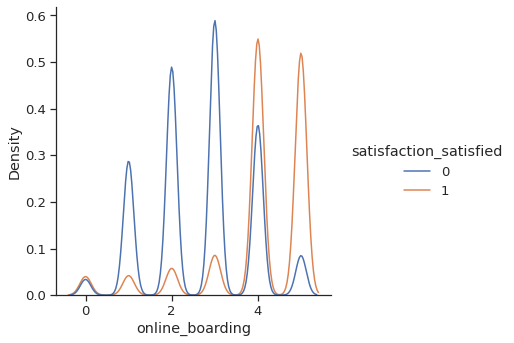

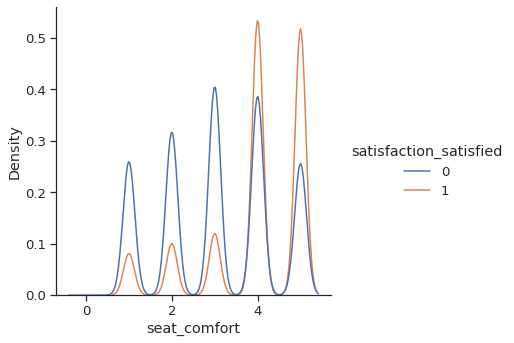

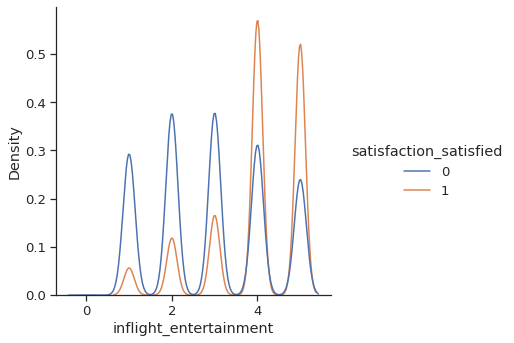

In [ ]:
# Focus on interesting features
focus_features = ['age', 'flight_distance', 'inflight_wifi_service', 'online_boarding', 'seat_comfort', 'inflight_entertainment']


sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(focus_features):
    sns.displot(data=data, x=feature, kind='kde', hue='satisfaction_satisfied')  
    
sns.despine()


# **Missing Data**
Next, we look at the data to find if anything is missing


In [ ]:
print (data.isnull().sum())

age                                    0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
Gender_Male                            0
customer_type_disloyal Customer        0
type_of_travel_Personal Travel         0
customer_class_Eco                     0
customer_class_Eco Plus                0
satisfaction_satisfied                 0
dtype: int64


Only one column (arrival delay) has any missing values, and the number is not large. We could just remove the relevant instances or impute them,Lets check how much the arrival delay and departure delay are correlated:

Correlation between departure and arrival delays:  0.9652911835467097


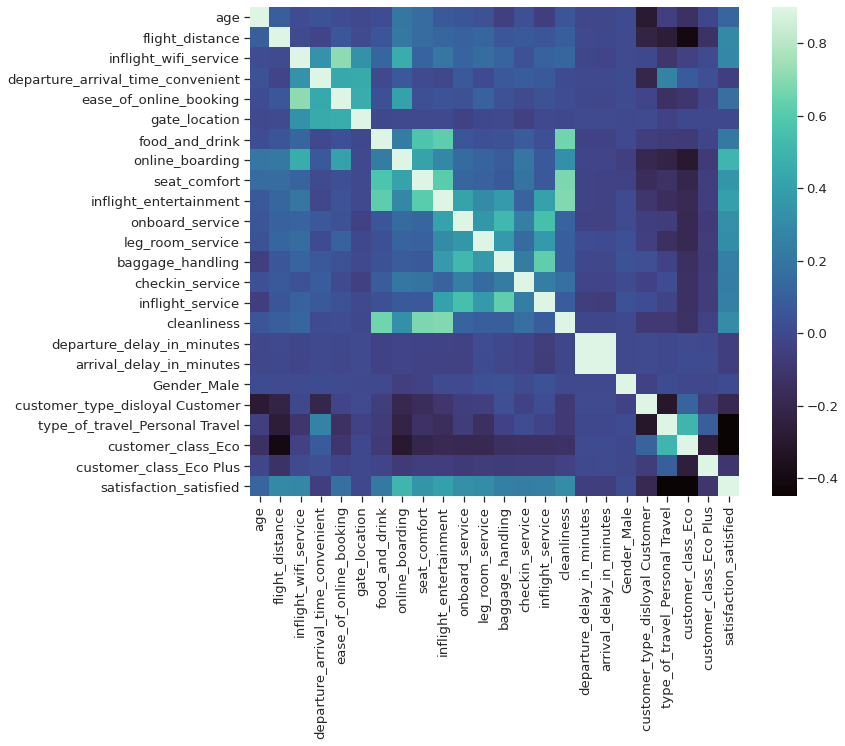

In [ ]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'mako',annot=False,cbar=True)
print ('Correlation between departure and arrival delays: ', corrmat['arrival_delay_in_minutes']['departure_delay_in_minutes'])

It is very obvious that the two delays are highly correlated (see the two whitest cells off the diagonal), and indeed the correlation value is 0.965. We can therefore use the departure delay data to impute the missing arrival delay data

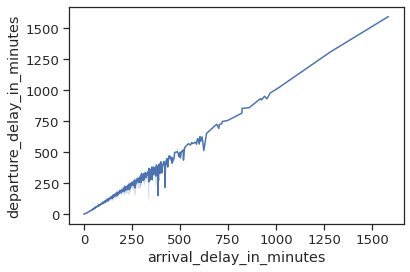

In [ ]:
sns.lineplot(data.arrival_delay_in_minutes,data.departure_delay_in_minutes)

In [ ]:
# Fix data by imputation
data['arrival_delay_in_minutes'].fillna(data['departure_delay_in_minutes'], inplace = True)
print (data.isnull().sum())

age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
customer_class_Eco                   0
customer_class_Eco Plus              0
satisfaction_satisfied               0
dtype: int64


# Outliers
Most columns in our data have a relatively narrow range of possibilities (such as the values from 0 to 5). In this context, the flight distance and departure and arrival delays stand out. Let's take a closer look:

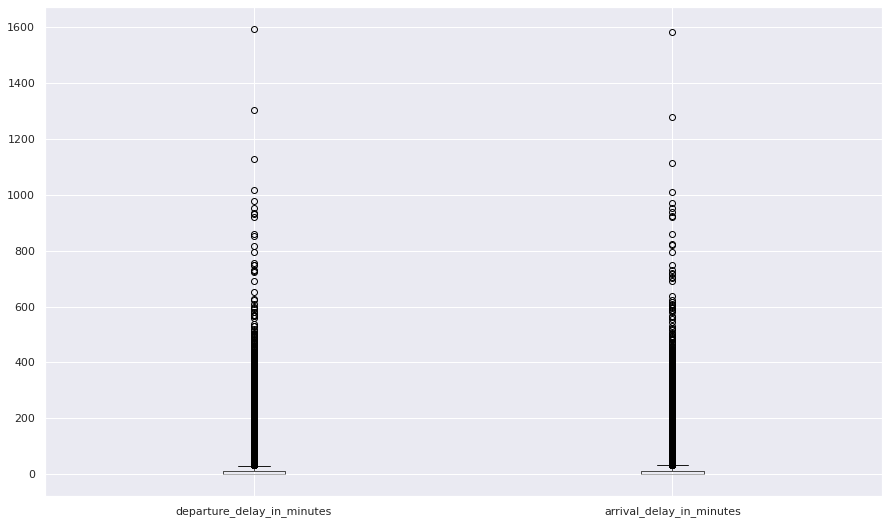

In [ ]:
sns.set()
plt.figure(figsize= (15,9))
data[['departure_delay_in_minutes','arrival_delay_in_minutes']].boxplot()
plt.show()

It seems that only very few instances have a delay (in either arrival or departure) of > 500 minutes. Let's test this hypothesis:

In [ ]:
print ((data['arrival_delay_in_minutes']> 400).sum())
print ((data['departure_delay_in_minutes']> 400).sum())
print (((data['departure_delay_in_minutes']> 400) + (data['arrival_delay_in_minutes']> 400)).sum())


116
102
119


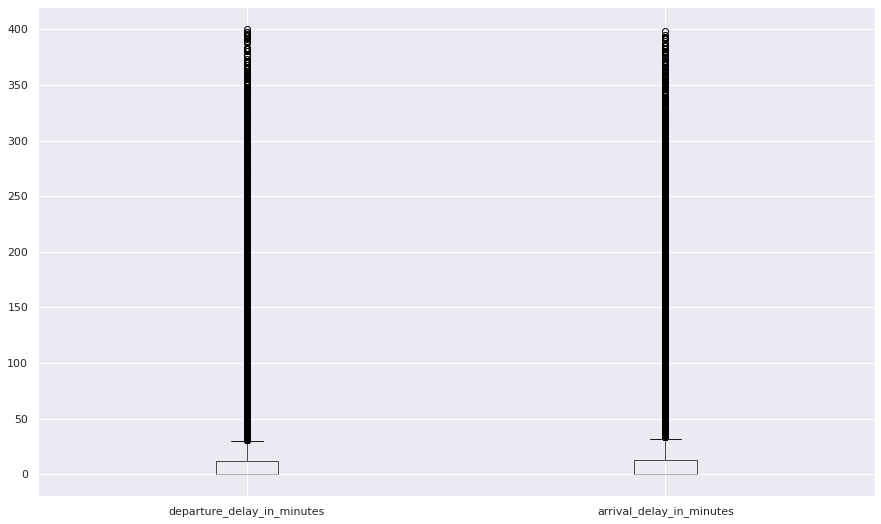

In [ ]:
data = data[(data['arrival_delay_in_minutes'] <= 400)]
data = data[(data['departure_delay_in_minutes'] <= 400)]
sns.set()
plt.figure(figsize= (15,9))
data[['departure_delay_in_minutes','arrival_delay_in_minutes']].boxplot()
plt.show()


# Prepare data for modeling
Now that the data is clean and numerical. Finally, we normalize the data so that each column has values between 0 and 1.

In [ ]:
# Prepare for modeling - migrate to Numpy and split to training and test sets
from sklearn.model_selection import train_test_split

x = data.drop('satisfaction_satisfied',axis =1)
y = data['satisfaction_satisfied']

# Normalize features
for feature in range (x.shape[1]):
    min = x.iloc[:,feature].min()
    max = x.iloc[:,feature].max()
    x.iloc[:,feature] = (x.iloc[:,feature]-min) / (max-min)
    
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=347)
print("The training data size is : {} ".format(x_train.shape))
print("The test data size is : {} ".format(x_test.shape))

The training data size is : (103808, 23) 
The test data size is : (25953, 23) 


We are now ready to begin modeling.

# Decision Tree model
Arguably, the most straightforward way to predict the targets from the features is using a decision tree. We use the sklearn model, with unrestricted depth:

In [ ]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=120)
adb.fit(x_train,y_train)
adaboost_training_score = 100*adb.score(x_train,y_train)
adaboost_test_score = 100*adb.score(x_test,y_test)
print("Adaboost accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(adaboost_training_score, adaboost_test_score))

Adaboost accuracy. Train : 93.01%, Test: 92.76%. 


In [ ]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
# Try 100 estimators
gdb = GradientBoostingClassifier(n_estimators=100)
gdb.fit(x_train,y_train)
gradient_boost_training_score = 100*gdb.score(x_train,y_train)
gradient_boost_test_score = 100*gdb.score(x_test,y_test)
print("Gradient boost accuracy for 100 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(gradient_boost_training_score, gradient_boost_test_score))
# Try 200 estimators
gdb = GradientBoostingClassifier(n_estimators=200)
gdb.fit(x_train,y_train)
gradient_boost_training_score = 100*gdb.score(x_train,y_train)
gradient_boost_test_score = 100*gdb.score(x_test,y_test)
print("Gradient boost accuracy for 200 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(gradient_boost_training_score, gradient_boost_test_score))

Gradient boost accuracy for 100 estimators. Train : 94.16%, Test: 94.03%. 
Gradient boost accuracy for 200 estimators. Train : 95.27%, Test: 95.11%. 


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit (x_train, y_train)
nbc_training_score = 100*nbc.score(x_train,y_train)
nbc_test_score = 100*nbc.score(x_test,y_test)
print("Naive Bayes accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(nbc_training_score, nbc_test_score))

Naive Bayes accuracy. Train : 85.93%, Test: 85.76%. 


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000)
logr.fit (x_train, y_train)
logr_training_score = 100*logr.score(x_train,y_train)
logr_test_score = 100*logr.score(x_test,y_test)
print("Logistic Regression accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(logr_training_score, logr_test_score))

Logistic Regression accuracy. Train : 87.48%, Test: 87.26%. 
